# Experiment

This notebook provides small experiments in the paper "Characterizing Overfitting in Kernel Ridgeless Regression Through the Eigenspectrum". 


## 0. Import Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import time
from scipy.special import eval_hermitenorm
from scipy.linalg import svdvals

# Select one of the following
#np.random.seed(int(time.time()))
np.random.seed(0)

#graphic
sns.set(style="white")
sns.set_palette("dark")
#sns.pairplot(data, kind="scatter", hue = "Class")
plt.rcParams.update({'font.size': 30})
plt.rcParams['lines.linewidth'] = 4
plt.rc('legend',fontsize=16)
plt.rc('axes', titlesize=16)
plt.rc('axes', labelsize=16)

print("Packages imported.")

Packages imported.


# 1. Sub-Gaussian concentration for matrix with isotropic rows/columns

We consider the spectrum of the whitened input block $\mathbf{Z}^\top\in\mathbb{R}^{p\times n}$, where the columns $\mathbf{z}_i\in\mathbb{R}^p$ are independent draws of the isotropic sub-Gaussian random vetors $\mathbf{z}$. 

Let $\mathbf{P}=diag(P_i)$ be a diagonal matrix with $P_i = \frac{\|\mathbf{z}_i\|_2}{\sqrt{p}} $ and let $\hat{\mathbf{Z}}^\top= \mathbf{P}^{-1} \mathbf{Z}^\top$ be the matrix with normalized columns: $\hat{\mathbf{z}}_i = P_i^{-1} \mathbf{z}_i =\sqrt{p},\ \forall i=1,...,n$.


By Vershynin's theorem, there is a high probability bound on the the spectrum of $\mathbf{Z}^\top$:
\begin{equation*}
    \sqrt{p} -c_2\sqrt{n} - t   \leq s_n(\hat{\mathbf{Z}}^\top) \leq s_1(\hat{\mathbf{Z}}^\top) \leq \sqrt{p} + c_2\sqrt{n} - t 
\end{equation*}
with probability at least $1-2\exp(-c_1t^2)$.

Hence for $p>n$ large enough, one could have $s_i\left(\frac{1}{\sqrt{p}}\hat{\mathbf{Z}}^\top\right) \approx 1,\ \forall i=1,...,n,$ with high probability.

Finally, it holds that $\min_i\{P_i\} \leq s_i\left(\frac{1}{\sqrt{p}}\mathbf{Z}^\top\right) \leq \max_i\{P_i\} ,\ \forall i=1,...,n.$

## 1.1 Independent Features (rows)

We assume that the entries $z^{(k)},\ k=1,...,p,$ of the isotropic random vectors $\mathbf{z}$ are independent to each other. Hence the matrix $\mathbf{Z}$ has both independent rows and columns. 

Here we take ${z}^{(k)}\sim \mathcal{N}(0,1)$ or ${z}^{(k)}\sim \mathcal{U}(-\sqrt{3},+\sqrt{3})$, for $k=1,...,p$ .

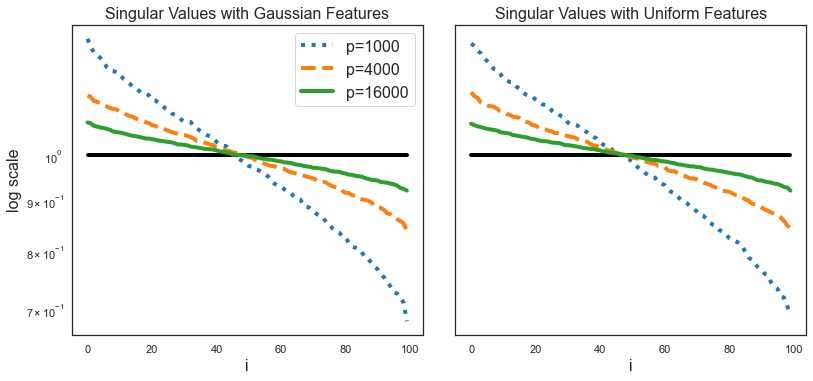

In [483]:
# Number of samples
n = 100

# Number of features 
p_list = [1000, 4000, 16000]
singular_values_list = []

# Set cooler-blind friendly colors and line styles
colors = ['tab:blue', 'tab:orange', 'tab:green']
line_styles = [':', '--', '-']

# Create subplots with shared y-axis
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

for j, distribution in enumerate(['Gaussian', 'Uniform']):
    ax = axs[j]

    ax.plot(np.ones(n), color='black', linestyle='-', label='_')  # Dummy line for legend
    ax.set_xlabel('i')
    ax.set_yscale('log')
    ax.set_title('Singular Values with {} Features'.format(distribution.capitalize()))

    # Display y-axis label only on the left plot
    if j == 0:
        ax.set_ylabel('log scale')

    # Generate plot
    for i, p in enumerate(p_list):
        if distribution == 'Gaussian':
            Z = np.random.randn(n, p)
        elif distribution == 'Uniform':
            Z = np.random.uniform(-1, 1, size=(n, p)) * np.sqrt(3)

        singular_values = svdvals(Z / np.sqrt(p))
        singular_values_list.append(singular_values)
        ax.plot(singular_values, color=colors[i], linestyle=line_styles[i], label='p={}'.format(p))

    # Display legend only on the left plot
    if j == 0:
        ax.legend()

# Adjust layout
plt.tight_layout()

# Save or display
plt.savefig('Z_spectrum_independent_features.pdf', bbox_inches="tight")
plt.show()



Set $\mathbf{X} = \mathbf{Z} \bm{\Sigma}^{1/2} \in\mathbb{R}^{n \times p}$, where $\bm{\Sigma}=diag(\lambda_k)$ with $\lambda_k=\Theta(k^{-1-a}),\ a>0$, and compute the singular values of $\mathbf{X} / \sqrt{p}$.

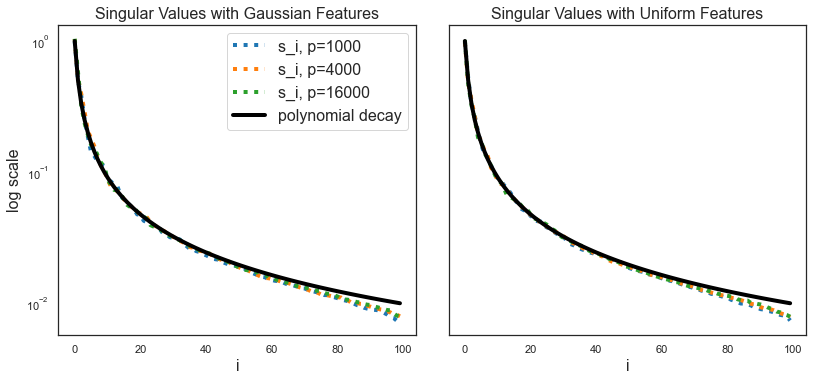

In [484]:
# Number of samples
n = 100

# Number of features 
p_list = [1000, 4000, 16000]
singular_values_list = []

# Set cooler-blind friendly colors and line styles
colors = ['tab:blue', 'tab:orange', 'tab:green']
line_styles = [':', '--', '-']

# Create subplots with shared y-axis
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

for j, distribution in enumerate(['Gaussian', 'Uniform']):
    ax = axs[j]

    ax.set_xlabel('i')
    ax.set_yscale('log')
    ax.set_title('Singular Values with {} Features'.format(distribution.capitalize()))

    # Display y-axis label only on the left plot
    if j == 0:
        ax.set_ylabel('log scale')

    # Generate plot
    for i, p in enumerate(p_list):
        if distribution == 'Gaussian':
            Z = np.random.randn(n, p)
        elif distribution == 'Uniform':
            Z = np.random.uniform(-1, 1, size=(n, p)) * np.sqrt(3)

        # Compute matrix X
        eigenvalues = 1 / np.square(np.arange(1, p+1))
        Sigma = np.diag(eigenvalues)
        X = Z @ np.sqrt(Sigma)

        singular_values = svdvals(X / np.sqrt(n))
        

        ax.plot(singular_values, color=colors[i], linestyle=':', label='s_i, p={}'.format(p))
    ax.plot(np.sqrt(eigenvalues[0:n]), color='black', linestyle='-', label='polynomial decay')


    # Display legend only on the left plot
    if j == 0:
        ax.legend()

# Adjust layout
plt.tight_layout()

# Save or display
plt.savefig('X_spectrum_independent_features.pdf', bbox_inches="tight")
plt.show()

We can also study the effect of ratio $\eta=p/n$ on the smallest singular value:

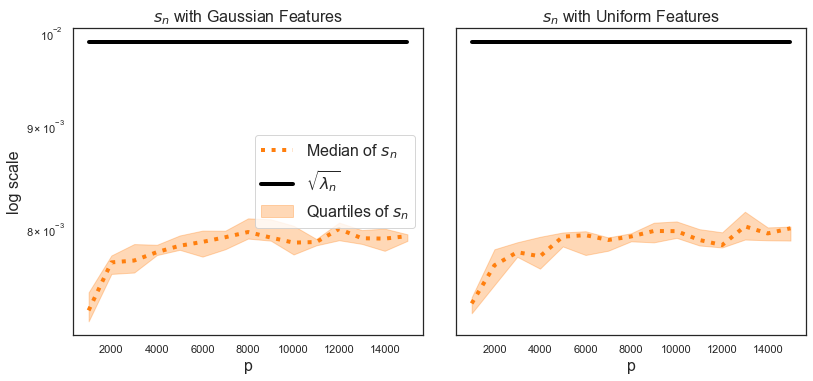

In [499]:
# Number of samples
n = 100

# Number of features 
p_list = np.arange(1000, 16000, 1000)

# Set cooler-blind friendly colors and line styles
colors = ['tab:blue', 'tab:orange', 'tab:green']
line_styles = [':', '--', '-']

# Create subplots with shared y-axis
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

for j, distribution in enumerate(['Gaussian', 'Uniform']):
    s_min_samples = []

    ax = axs[j]

    ax.set_xlabel('p')
    ax.set_yscale('log')
    ax.set_title('$s_n$ with {} Features'.format(distribution.capitalize()))

    # Display y-axis label only on the left plot
    if j == 0:
        ax.set_ylabel('log scale')

    # Generate plot for 10 iterations
    for iteration in range(10):
        s_min_list = []
        for i, p in enumerate(p_list):
            if distribution == 'Gaussian':
                Z = np.random.randn(n, p)
            elif distribution == 'Uniform':
                Z = np.random.uniform(-1, 1, size=(n, p)) * np.sqrt(3)

            # Compute matrix X
            eigenvalues = 1 / np.square(np.arange(1, p + 1))
            Sigma = np.diag(eigenvalues)
            X = Z @ np.sqrt(Sigma)

            s_min = svdvals(X / np.sqrt(n))[-1]
            s_min_list.append(s_min)

        s_min_samples.append(s_min_list)

    # Convert list of s_min values to NumPy array for easier manipulation
    s_min_samples = np.array(s_min_samples)

    # Calculate median and quartiles along the first axis (across iterations)
    median_s_min = np.median(s_min_samples, axis=0)
    quartiles_s_min = np.percentile(s_min_samples, [25, 75], axis=0)

    # Plot median and quartiles
    ax.plot(p_list, median_s_min, color="tab:orange", linestyle=':', label='Median of $s_n$')
    ax.fill_between(p_list, quartiles_s_min[0], quartiles_s_min[1], color='tab:orange', alpha=0.3, label='Quartiles of $s_n$')

    # Plot the theoretical value of sqrt(lambda_n)
    ax.plot(p_list, np.sqrt(eigenvalues[n]) * np.ones(len(p_list)), color='black', linestyle='-', label='$\sqrt{\lambda_n}$')

    # Display legend only on the left plot
    if j == 0:
        ax.legend()

# Adjust layout
plt.tight_layout()

# Save or display
plt.savefig('s_min_independent_features.pdf', bbox_inches="tight")
plt.show()


## 1.2 Dependent Features (rows)

Now consider dependent features $z^{(k)}$, for example, $z^{(k)}=\cos(k\cdot)$.  

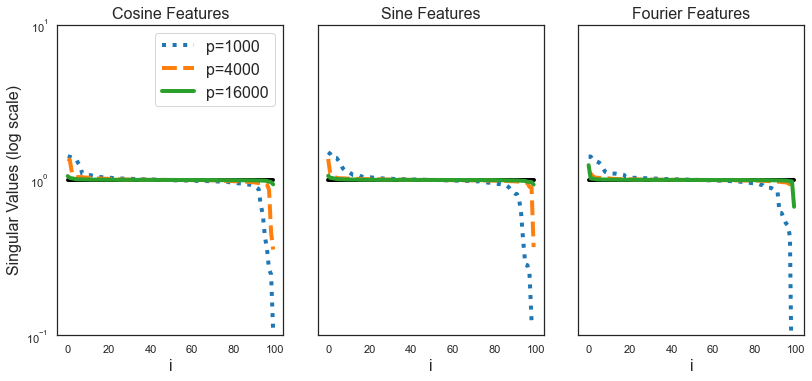

In [503]:
# Number of samples
n = 100

# Number of features 
p = 100000

# Generate random set X on the interval [-pi, pi]
D = np.random.uniform(-np.pi, np.pi, n)

# Initialize an array to store the evaluations at cos(kx) for k = 1 to p
Z = np.zeros((n, p))

# Evaluate X at cos(kx) for k = 1 to p
for k in range(1, p+1):
    Z[:, k-1] = np.cos(k * D) * np.sqrt(2) # normalize


singular_values = svdvals(Z/np.sqrt(p))


# Number of samples
n = 100

# Number of features 
p_list = [1000, 4000, 16000]
singular_values_list = []

# Set cooler-blind friendly colors and line styles
colors = ['tab:blue', 'tab:orange', 'tab:green']
line_styles = [':', '--', '-']

# Create subplots with shared y-axis
fig, axs = plt.subplots(1, 3, figsize=(12, 6), sharey=True)



for j, distribution in enumerate(['Cosine', 'Sine', 'Fourier']):
    ax = axs[j]

    ax.plot(np.ones(n), color='black', linestyle='-', label='_')  # Dummy line for legend
    ax.set_xlabel('i')
    ax.set_yscale('log')
    ax.set_ylim((0.1,10))
    ax.set_title('{} Features'.format(distribution.capitalize()))

    # Display y-axis label only on the left plot
    if j == 0:
        ax.set_ylabel('Singular Values (log scale)')

    # Generate plot
        
    for i, p in enumerate(p_list):

        # Generate random set X on the interval [-pi, pi]
        D = np.random.uniform(-np.pi, np.pi, n)

        # Initialize an array to store the evaluations at cos(kx) for k = 1 to p
        Z = np.zeros((n, p))

        for k in range(1, p+1):
            if distribution == 'Cosine':
                # Evaluate X at cos(kx) for k = 1 to p
                Z[:, k-1] = np.cos(k * D) * np.sqrt(2) # normalize
            elif distribution == 'Sine':
                # Evaluate X at sin(kx) for k = 1 to p
                Z[:, k-1] = np.sin(k * D) * np.sqrt(2) # normalize
            elif distribution == 'Fourier':
                if k % 2 == 0:
                    Z[:, k-1] = np.cos((k//2) * D) * np.sqrt(2)  # compute cosine
                else:
                    Z[:, k-1] = np.sin(((k+1)//2) * D) * np.sqrt(2)  # compute sine
        singular_values = svdvals(Z / np.sqrt(p))
        singular_values_list.append(singular_values)
        ax.plot(singular_values, color=colors[i], linestyle=line_styles[i], label='p={}'.format(p))

    # Display legend only on the left plot
    if j == 0:
        ax.legend()

# Adjust layout
plt.tight_layout()

# Save or display
plt.savefig('Z_spectrum_fourier_features.pdf', bbox_inches="tight")
plt.show()

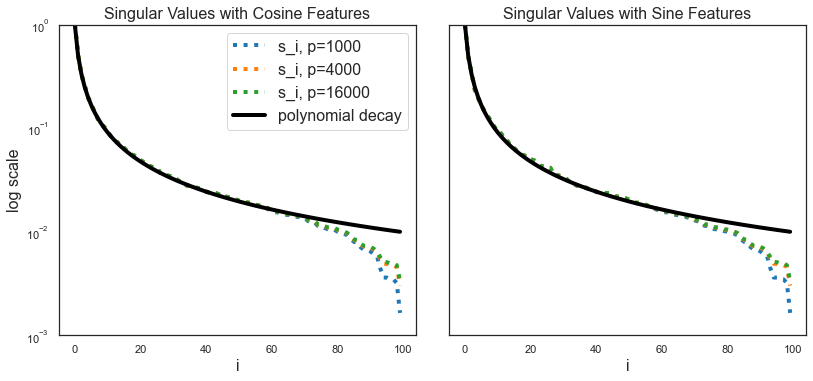

In [492]:
# Create subplots with shared y-axis
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Generate random set X on the interval [-pi, pi]
D = np.random.uniform(-np.pi, np.pi, n)

for j, distribution in enumerate(['Cosine', 'Sine']):
    ax = axs[j]

    ax.set_xlabel('i')
    ax.set_yscale('log')
    ax.set_ylim((0.001,1))
    ax.set_title('Singular Values with {} Features'.format(distribution.capitalize()))

    # Display y-axis label only on the left plot
    if j == 0:
        ax.set_ylabel('log scale')

    # Generate plot
    for i, p in enumerate(p_list):

        # Initialize an array to store the evaluations at cos(kx) for k = 1 to p
        Z = np.zeros((n, p))

        if distribution == 'Cosine':
            # Evaluate X at cos(kx) for k = 1 to p
            for k in range(1, p+1):
                Z[:, k-1] = np.cos(k * D) * np.sqrt(2) # normalize
        elif distribution == 'Sine':
            # Evaluate X at cos(kx) for k = 1 to p
            for k in range(1, p+1):
                Z[:, k-1] = np.sin(k * D) * np.sqrt(2) # normalize

        # Compute matrix X
        eigenvalues = 1 / np.square(np.arange(1, p+1))
        Sigma = np.diag(eigenvalues)
        X = Z @ np.sqrt(Sigma)

        singular_values = svdvals(X / np.sqrt(n))
        

        ax.plot(singular_values, color=colors[i], linestyle=':', label='s_i, p={}'.format(p))
    ax.plot(np.sqrt(eigenvalues[0:n]), color='black', linestyle='-', label='polynomial decay')


    # Display legend only on the left plot
    if j == 0:
        ax.legend()

# Adjust layout
plt.tight_layout()

# Save or display
plt.savefig('X_spectrum_co_sine_features.pdf', bbox_inches="tight")
plt.show()

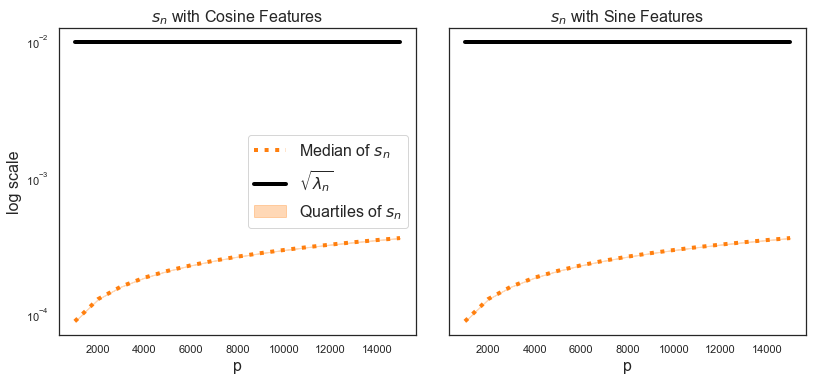

In [500]:
# Number of samples
n = 100

D = np.random.uniform(-np.pi, np.pi, n)

# Number of features 
p_list = np.arange(1000, 16000, 1000)

# Set cooler-blind friendly colors and line styles
colors = ['tab:blue', 'tab:orange', 'tab:green']
line_styles = [':', '--', '-']

# Create subplots with shared y-axis
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
# Generate random set X on the interval [-pi, pi]

for j, distribution in enumerate(['Cosine', 'Sine', 'Fourier']):
    s_min_samples = []

    ax = axs[j]

    ax.set_xlabel('p')
    ax.set_yscale('log')
    ax.set_title('$s_n$ with {} Features'.format(distribution.capitalize()))

    # Display y-axis label only on the left plot
    if j == 0:
        ax.set_ylabel('log scale')

    # Generate plot for 10 iterations
    for iteration in range(10):
        s_min_list = []
        for i, p in enumerate(p_list):
            # Initialize an array to store the evaluations at cos(kx) for k = 1 to p
            Z = np.zeros((n, p))

            if distribution == 'Cosine':
            # Evaluate X at cos(kx) for k = 1 to p
                for k in range(1, p+1):
                    Z[:, k-1] = np.cos(k * D) * np.sqrt(2) # normalize
            elif distribution == 'Sine':
                # Evaluate X at cos(kx) for k = 1 to p
                for k in range(1, p+1):
                    Z[:, k-1] = np.sin(k * D) * np.sqrt(2) # normalize
            elif distribution == 'Fourier':
                if k % 2 == 0:
                    Z[:, k-1] = np.cos((k//2) * D) * np.sqrt(2)  # compute cosine
                else:
                    Z[:, k-1] = np.sin(((k+1)//2) * D) * np.sqrt(2)  # compute sine

            # Compute matrix X
            eigenvalues = 1 / np.square(np.arange(1, p + 1))
            Sigma = np.diag(eigenvalues)
            X = Z @ np.sqrt(Sigma)

            s_min = svdvals(X / np.sqrt(n))[-1]
            s_min_list.append(s_min)

        s_min_samples.append(s_min_list)

    # Convert list of s_min values to NumPy array for easier manipulation
    s_min_samples = np.array(s_min_samples)

    # Calculate median and quartiles along the first axis (across iterations)
    median_s_min = np.median(s_min_samples, axis=0)
    quartiles_s_min = np.percentile(s_min_samples, [25, 75], axis=0)

    # Plot median and quartiles
    ax.plot(p_list, median_s_min, color="tab:orange", linestyle=':', label='Median of $s_n$')
    ax.fill_between(p_list, quartiles_s_min[0], quartiles_s_min[1], color='tab:orange', alpha=0.3, label='Quartiles of $s_n$')

    # Plot the theoretical value of sqrt(lambda_n)
    ax.plot(p_list, np.sqrt(eigenvalues[n]) * np.ones(len(p_list)), color='black', linestyle='-', label='$\sqrt{\lambda_n}$')

    # Display legend only on the left plot
    if j == 0:
        ax.legend()

# Adjust layout
plt.tight_layout()

# Save or display
plt.savefig('s_min_cos_sine_features.pdf', bbox_inches="tight")
plt.show()

KeyboardInterrupt: 

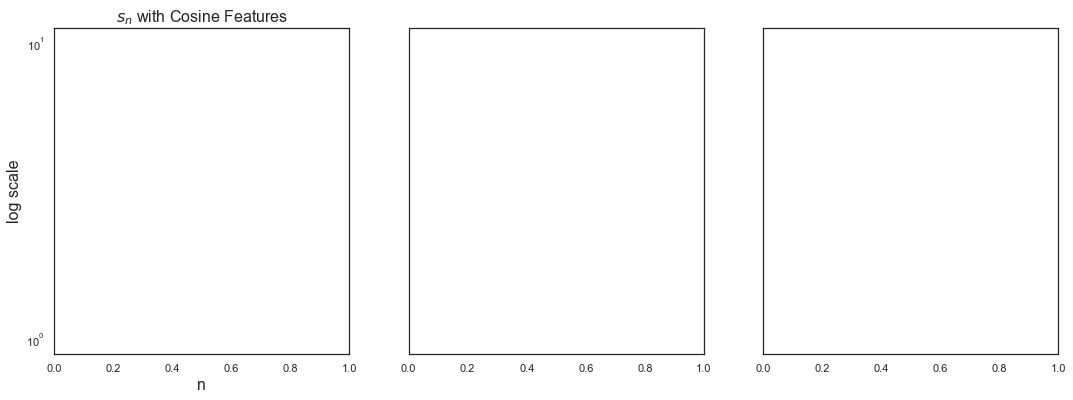

In [7]:
# ratio = p/n
ratio = 100

# Number of features 
n_list = np.arange(100, 1000, 100)

# Number of iterations
num_it = 10

# Set cooler-blind friendly colors and line styles
colors = ['tab:blue', 'tab:orange', 'tab:green']
line_styles = [':', '--', '-']

# Create subplots with shared y-axis
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
# Generate random set X on the interval [-pi, pi]

for j, distribution in enumerate(['Cosine', 'Sine', 'Fourier']):
    s_min_samples = []

    ax = axs[j]

    ax.set_xlabel('n')
    ax.set_yscale('log')
    ax.set_title('$s_n$ with {} Features'.format(distribution.capitalize()))

    # Display y-axis label only on the left plot
    if j == 0:
        ax.set_ylabel('log scale')

    # Generate plot for 10 iterations
    for iteration in range(num_it):
        s_min_list = []
        for i, n in enumerate(n_list):
            p = ratio * n
            # Initialize an array to store the evaluations at cos(kx) for k = 1 to p
            Z = np.zeros((n, p))
            D = np.random.uniform(-np.pi, np.pi, n)

            for k in range(1, p+1):
                if distribution == 'Cosine':
                # Evaluate X at cos(kx) for k = 1 to p
                    Z[:, k-1] = np.cos(k * D) * np.sqrt(2) # normalize
                elif distribution == 'Sine':
                # Evaluate X at cos(kx) for k = 1 to p
                    Z[:, k-1] = np.sin(k * D) * np.sqrt(2) # normalize
                elif distribution == 'Fourier':
                    if k % 2 == 0:
                        Z[:, k-1] = np.cos((k//2) * D) * np.sqrt(2)  # compute cosine
                    else:
                        Z[:, k-1] = np.sin(((k+1)//2) * D) * np.sqrt(2)  # compute sine

            # Compute matrix X
            eigenvalues = 1 / np.square(np.arange(1, p + 1))
            Sigma = np.diag(eigenvalues)
            X = Z @ np.sqrt(Sigma)

            s_min = svdvals(X / np.sqrt(n))[-1]
            s_min_list.append(s_min)

        s_min_samples.append(s_min_list)

    # Convert list of s_min values to NumPy array for easier manipulation
    s_min_samples = np.array(s_min_samples)

    # Calculate median and quartiles along the first axis (across iterations)
    median_s_min = np.median(s_min_samples, axis=0)
    quartiles_s_min = np.percentile(s_min_samples, [25, 75], axis=0)

    # Plot median and quartiles
    ax.plot(n_list, median_s_min, color="tab:orange", linestyle=':', label='Median of $s_n$')
    ax.fill_between(n_list, quartiles_s_min[0], quartiles_s_min[1], color='tab:orange', alpha=0.3, label='Quartiles of $s_n$')

    # Plot the theoretical value of sqrt(lambda_n)
    ax.plot(n_list, np.sqrt(eigenvalues[n]) * np.ones(len(n_list)), color='black', linestyle='-', label='$\sqrt{\lambda_n}$')

    # Display legend only on the left plot
    if j == 0:
        ax.legend()

# Adjust layout
plt.tight_layout()

# Save or display
plt.savefig('s_min_fourier_ratio.pdf', bbox_inches="tight")
plt.show()

# 3. Empirical Kernel spectrum

We can further compute the spectra for realistic kernels such as Laplacian and Gaussian kernels. 

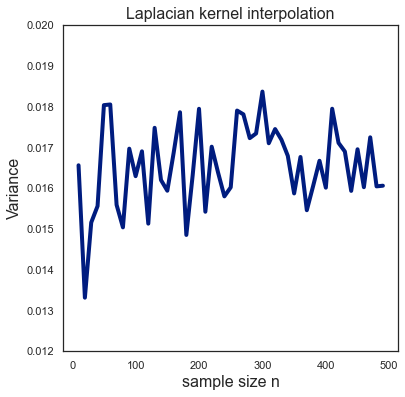

In [59]:
from sklearn.kernel_ridge import KernelRidge
#from scipy.linalg import eigh
from sklearn.metrics.pairwise import pairwise_kernels

# Function to generate a dataset with noisy labels
def generate_dataset(n_train=50, noise=0.1):
    X_train = np.sort(np.random.rand(n_train, 1), axis=0)
    y_train = noise * np.random.normal(size=n_train)
    return X_train, y_train


# Function to perform kernel ridge regression and plot the results
def kernel_ridge_regression(X_train, y_train, X_test, y_test, kernel, alpha):
    #K_train = pairwise_kernels(X_train, X_train, metric=kernel)
    #K_test = pairwise_kernels(X_test, X_train, metric=kernel)
    model = KernelRidge(alpha=alpha, kernel=kernel)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_pred, y_test)
    return mse



# Generate a dataset
noise = 0.1
n_test = 1000
X_test = np.sort(np.random.rand(n_test, 1), axis=0)
y_test = noise * np.random.normal(size=n_test)

mse_list = []
n_train_list = np.arange(10,500,10)
for n_train in n_train_list:
    X_train, y_train = generate_dataset(n_train=n_train, noise=0.1)
    mse = kernel_ridge_regression(X_train, y_train, X_test, y_test, kernel='laplacian', alpha=0.0)
    mse_list.append(mse)

plt.figure(figsize=(6, 6))
plt.plot(n_train_list,mse_list)
plt.xlabel('sample size n')
plt.ylabel('Variance')
plt.title('Laplacian kernel interpolation')
plt.ylim(0.012,0.02)
plt.savefig('laplacian_variance.pdf', bbox_inches="tight")
plt.show()


# Cosine Features

$\mathbf{Z}\in\mathbb{R}^{n\times p}$ with isotropic rows $\mathbf{z}^\top$. $\bm{\Sigma}$ is the covariance. We have $\mathbf{X} = \mathbf{Z} \bm{\Sigma}^{1/2} $.


In [520]:
# Number of points in X
n = 100

# Number of frequency 
p = 10000

# Generate random set X on the interval [-pi, pi]
D = np.random.uniform(-np.pi, np.pi, n)

# Initialize an array to store the evaluations at cos(kx) for k = 1 to p
Z = np.zeros((n, p))

# Evaluate X at cos(kx) for k = 1 to p
for k in range(1, p+1):
    Z[:, k-1] = np.cos(k * D) * np.sqrt(2) # normalize

eigenvalues2 = 1 / np.square(np.arange(1, p+1))
Sigma2 = np.diag(eigenvalues2)

eigenvalues3 = 1 / np.power(np.arange(1, p+1),3)
Sigma3 = np.diag(eigenvalues3)


X2 = Z @ np.sqrt(Sigma2)

X3 = Z @ np.sqrt(Sigma3)

singular_values2 = svdvals(X2/np.sqrt(n))

singular_values3 = svdvals(X3/np.sqrt(n))


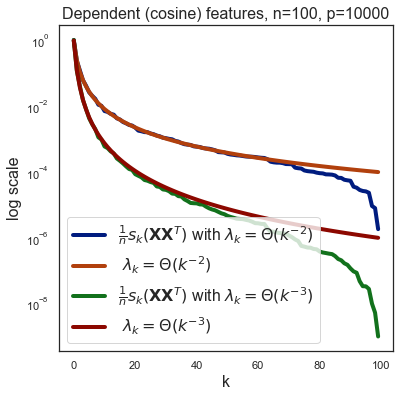

In [523]:
plt.figure(figsize=(6, 6))
plt.plot(np.square(singular_values2), label='$ \\frac{1}{n}s_k(\mathbf{X}\mathbf{X}^T) $ with $\lambda_k = \Theta (k^{-2})$')
plt.plot(eigenvalues2[0:n], label=' $\lambda_k = \Theta (k^{-2})$')
plt.plot(np.square(singular_values3), label='$ \\frac{1}{n}s_k(\mathbf{X}\mathbf{X}^T) $ with $\lambda_k = \Theta (k^{-3})$')
plt.plot(eigenvalues3[0:n], label=' $\lambda_k = \Theta (k^{-3})$')
plt.title('Dependent (cosine) features, n={}, p={}'.format(n,p))
plt.xlabel('k')
plt.ylabel('log scale')
plt.yscale('log')
plt.legend()
#plt.grid(True)
plt.savefig('cosine_spectrum.pdf', bbox_inches="tight")
plt.show()

In [294]:
# Overparamaterization
ratio = 5

n_list = np.arange(10,500,10)
s_min_list = []

# Number of points in X
for n in n_list:

    # Number of frequency 
    p = ratio * n

    # Compute eigenvalues
    eigenvalues = 1 / np.square(np.arange(1, p+1))

    Sigma = np.diag(eigenvalues)

    # Generate random set X on the interval [-pi, pi]
    D = np.random.uniform(-np.pi, np.pi, n)

    # Initialize an array to store the evaluations at cos(kx) for k = 1 to p
    Z = np.zeros((n, p))

    # Evaluate X at cos(kx) for k = 1 to p
    for k in range(1, p+1):
        Z[:, k-1] = np.cos(k * D)*np.sqrt(2)  # normalize

    X = Z @ np.sqrt(Sigma)

    # Compute s_min
    s_min = svdvals(X/np.sqrt(n))[-1]
    s_min_list.append(s_min)

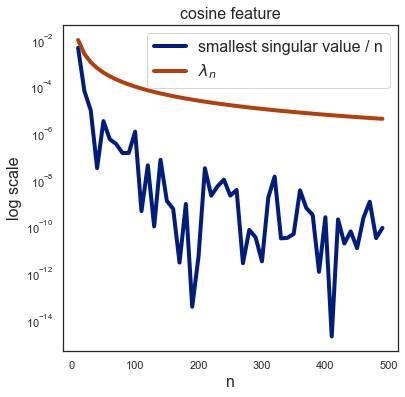

In [299]:

lambda_min_list = 1 / np.square(n_list)


plt.figure(figsize=(6, 6))
plt.plot(n_list, np.square(s_min_list), label='smallest singular value / n')
plt.plot(n_list, lambda_min_list, label='$\lambda_n$')
#plt.plot(n_list, np.square(lambda_min_list), label='$\lambda_n^2$')
plt.title('cosine feature')
plt.xlabel('n')
plt.ylabel('log scale')
plt.yscale('log')
plt.legend()
#plt.grid(True)
plt.savefig('cosine_s_min.pdf', bbox_inches="tight")
plt.show()

# Fourier (Sine + Cosine)

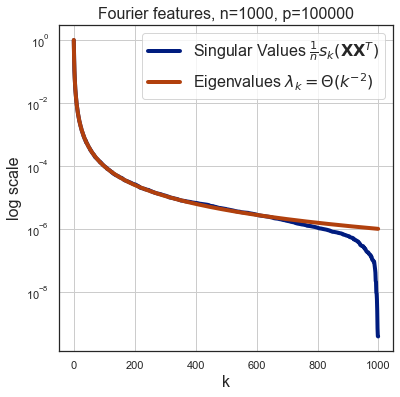

In [437]:

# Number of points in X
n = 1000

# Number of frequency 
p = 100000

# Generate random set X on the interval [-pi, pi]
D = np.random.uniform(-np.pi, np.pi, n)

# Initialize an array to store the evaluations at cos(kx) for k = 1 to p
Z = np.zeros((n, p))


for k in range(1, p+1):
    if k % 2 == 0:
        Z[:, k-1] = np.cos((k//2) * D) * np.sqrt(2)  # compute cosine
    else:
        Z[:, k-1] = np.sin(((k+1)//2) * D) * np.sqrt(2)  # compute sine

eigenvalues = 1 / np.square(np.arange(1, p+1))
Sigma = np.diag(eigenvalues)

X = Z @ np.sqrt(Sigma)

singular_values = np.linalg.svd(X/np.sqrt(n), compute_uv=False)

plt.figure(figsize=(6, 6))
plt.plot(np.square(singular_values), label='Singular Values $\\frac{1}{n}s_k(\mathbf{X}\mathbf{X}^T)$')
plt.plot(eigenvalues[0:n], label='Eigenvalues $\lambda_k = \Theta (k^{-2})$')
plt.title('Fourier features, n={}, p={}'.format(n,p))
plt.xlabel('k')
plt.ylabel('log scale')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.savefig('fourier_spectrum_1.pdf', bbox_inches="tight")
plt.show()

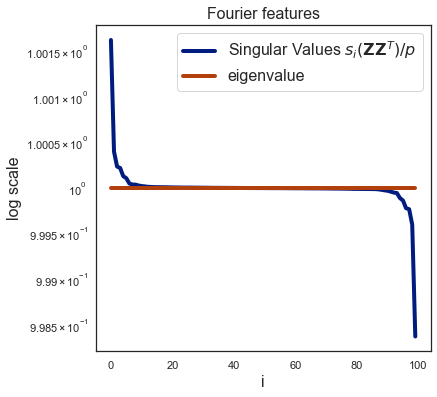

In [432]:

# Number of points in X
n = 100

# Number of frequency 
p = 10000000

# Generate random set X on the interval [-pi, pi]
D = np.random.uniform(-np.pi, np.pi, n)

# Initialize an array to store the evaluations at cos(kx) for k = 1 to p
Z = np.zeros((n, p))

for k in range(1, p+1):
    if k % 2 == 0:
        Z[:, k-1] = np.cos((k//2) * D) * np.sqrt(2)  # compute cosine
    else:
        Z[:, k-1] = np.sin(((k+1)//2) * D) * np.sqrt(2)  # compute sine



singular_values_Z = np.linalg.svd(Z/np.sqrt(p), compute_uv=False)


plt.figure(figsize=(6, 6))
plt.plot(np.square(singular_values_Z), label='Singular Values $s_i(\mathbf{Z}\mathbf{Z}^T)/ p$')
plt.plot(1*np.ones(n), label='eigenvalue')
plt.title('Fourier features')
plt.xlabel('i')
plt.ylabel('log scale')
plt.yscale('log')
plt.legend()
plt.show()

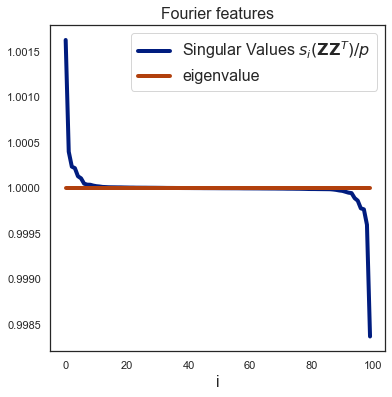

In [433]:
plt.figure(figsize=(6, 6))
plt.plot(np.square(singular_values_Z), label='Singular Values $s_i(\mathbf{Z}\mathbf{Z}^T)/ p$')
plt.plot(1*np.ones(n), label='eigenvalue')
plt.title('Fourier features')
plt.xlabel('i')
plt.legend()
plt.show()

# Gaussian Features

In [311]:
# Number of points in X
n = 100

# Number of frequency 
p = 3000

Z = np.random.randn(n,p)

eigenvalues = 1 / np.square(np.arange(1, p+1))
Sigma = np.diag(eigenvalues)

X = Z @ np.sqrt(Sigma)

singular_values = svdvals(X/np.sqrt(n))

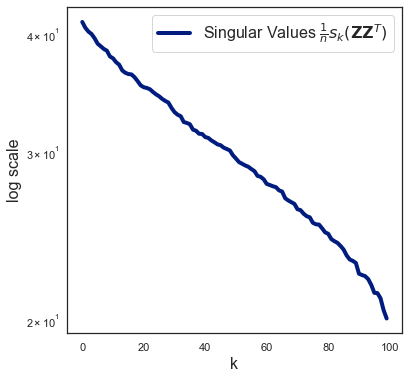

In [312]:
singular_values_Z = svdvals(Z/np.sqrt(n))
singular_values_Z2 = np.square(singular_values_Z)

plt.figure(figsize=(6, 6))
plt.plot(singular_values_Z2, label='Singular Values $ \\frac{1}{n}s_k(\mathbf{Z}\mathbf{Z}^T) $')
plt.xlabel('k')
plt.ylabel('log scale')
plt.yscale('log')
plt.legend()
plt.show()

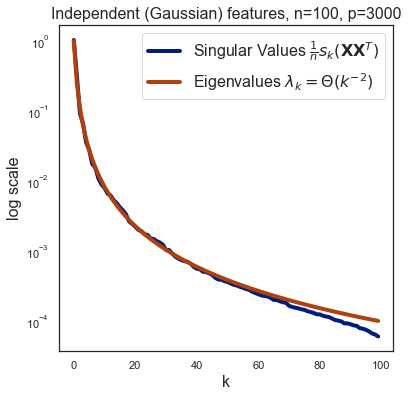

In [313]:
plt.figure(figsize=(6, 6))
plt.plot(np.square(singular_values), label='Singular Values $\\frac{1}{n}s_k(\mathbf{X}\mathbf{X}^T)$')
plt.plot(eigenvalues[0:n], label='Eigenvalues $\lambda_k = \Theta (k^{-2})$')
plt.title('Independent (Gaussian) features, n={}, p={}'.format(n,p))
plt.xlabel('k')
plt.ylabel('log scale')
plt.yscale('log')
plt.legend()
#plt.grid(True)
plt.savefig('gaussian_spectrum.pdf', bbox_inches="tight")
plt.show()

# Hermite Polynomial

In [140]:
D = np.random.randn(n)
Z = np.zeros((n, p))


for k in range(1, p+1):
    coeff = 1 / (np.sqrt(2**k * np.math.factorial(k) * 1.0))
    Z[:, k-1] = coeff * eval_hermitenorm(k,D) # normalize

X = Z @ Sigma
singular_values = np.linalg.svd(X/np.sqrt(n), compute_uv=False)

In [150]:
(Z.T@Z)/n

array([[ 4.52240658e-01, -1.09333969e-01, -6.88144347e-02, ...,
        -9.96103225e-17,  3.24244292e-17,  4.16031136e-17],
       [-1.09333969e-01,  1.53780038e-01, -2.01375117e-02, ...,
         7.84418809e-17, -3.27983470e-17, -3.40858842e-17],
       [-6.88144347e-02, -2.01375117e-02,  4.56507571e-02, ...,
        -1.07305520e-17,  1.52749878e-17,  4.64413540e-18],
       ...,
       [-9.96103225e-17,  7.84418809e-17, -1.07305520e-17, ...,
         2.75945089e-31, -2.97913395e-32, -1.32834211e-31],
       [ 3.24244292e-17, -3.27983470e-17,  1.52749878e-17, ...,
        -2.97913395e-32,  1.10966093e-31,  1.15011415e-32],
       [ 4.16031136e-17, -3.40858842e-17,  4.64413540e-18, ...,
        -1.32834211e-31,  1.15011415e-32,  6.47551426e-32]])

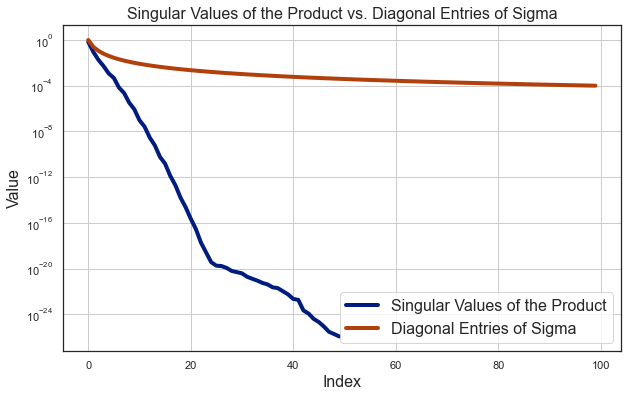

In [141]:
plt.figure(figsize=(10, 6))
plt.plot(singular_values, label='Singular Values of the Product')
plt.plot(eigenvalues, label='Diagonal Entries of Sigma')
plt.title('Singular Values of the Product vs. Diagonal Entries of Sigma')
plt.xlabel('Index')
plt.ylabel('Value')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

# Laplacian kernel

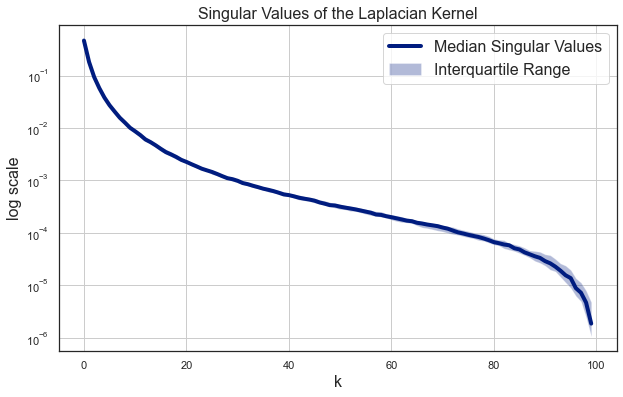

In [145]:
# Number of iterations
num_iterations = 50
n = 100  # Number of points in each iteration

# Initialize an empty list to store singular values from each iteration
singular_values_all = []

# Run multiple iterations
for _ in range(num_iterations):
    # Generate random Gaussian points
    X = np.random.randn(n)

    # Define the sigma parameter for the Laplacian kernel
    sigma = 1.0

    # Compute the pairwise distances between Gaussian points
    pairwise_distances = np.abs(X[:, np.newaxis] - X[np.newaxis, :])

    # Compute the kernel matrix using the Laplacian kernel formula
    kernel_matrix = np.exp(-pairwise_distances / sigma)

    # Compute singular values of the kernel matrix divided by n
    singular_values = np.linalg.svd(kernel_matrix / n, compute_uv=False)

    # Append singular values to the list
    singular_values_all.append(singular_values)

# Convert the list of singular values to a NumPy array
singular_values_all = np.array(singular_values_all)

# Compute quartiles
lower_quartile = np.percentile(singular_values_all, 25, axis=0)
median = np.percentile(singular_values_all, 50, axis=0)
upper_quartile = np.percentile(singular_values_all, 75, axis=0)

# Plot quartiles
plt.figure(figsize=(10, 6))
plt.plot(median, label='Median Singular Values')
plt.fill_between(range(len(median)), lower_quartile, upper_quartile, alpha=0.3, label='Interquartile Range')
plt.title('Singular Values of the Laplacian Kernel')
plt.xlabel('k')
plt.ylabel('log scale')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()


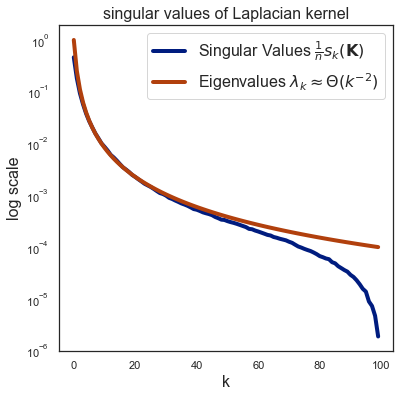

In [146]:
eigenvalues = 1 / np.square(np.arange(1, p+1))

plt.figure(figsize=(6, 6))
plt.plot(median, label='Singular Values $\\frac{1}{n}s_k(\mathbf{K})$')
plt.plot(eigenvalues[0:n], label='Eigenvalues $\lambda_k \\approx \Theta (k^{-2})$')
plt.title('singular values of Laplacian kernel')
plt.xlabel('k')
plt.ylabel('log scale')
plt.yscale('log')
plt.legend()
#plt.grid(True)
plt.savefig('laplacian_spectrum.pdf', bbox_inches="tight")
plt.show()

# Test Error Analysis

In [414]:
n =  10 # training size
p = 100 # kernel rank

test_size = 1000 # test size

decay_factor = 2
noise_variance = 1

def polynomial_decay_matrix(decay_factor=decay_factor, size=p):
    # Generate diagonal entries following polynomial decay
    diagonal_entries = np.array([ (k+1)**(-decay_factor) for k in range(size)])

    # Create a diagonal matrix
    decay_matrix = np.diag(diagonal_entries)

    return decay_matrix

def generate_data(n = n, p = p, if_noise = False, noise_variance = 1, true_coefficients = np.random.normal(0, 1/p, size=p)):
# Generate a random Gaussian matrix with non-trivial covariance
    
    covariance_matrix = polynomial_decay_matrix(decay_factor=decay_factor, size=p)
    
    D = np.random.uniform(-np.pi, np.pi, n)

    # Initialize an array to store the evaluations at cos(kx) for k = 1 to p
    Z = np.zeros((n, p))

    for k in range(1, p+1):
        if k % 2 == 0:
            Z[:, k-1] = np.cos((k//2) * D) * np.sqrt(2)  # compute cosine
        else:
            Z[:, k-1] = np.sin(((k+1)//2) * D) * np.sqrt(2)  # compute sine

    input = Z @ np.sqrt(covariance_matrix)
    output = np.dot(input, true_coefficients)
    if if_noise == True:
        output += np.random.normal(0, noise_variance, size=n)
    return input, output

num_it = 10
n_list = np.arange(10,200,10)
ratio = 100 # the overparameterization ratio
mse_list=[]
mse_upper_quartile = []
mse_lower_quartile = []
cond_list = []
cond_upper_quartile = []
cond_lower_quartile = []



for n in n_list:
    p = n * ratio
    true_coefficients = np.random.normal(0, 1/p, size=p) # determine a new random true coefficient for each N,M
    X_test, y_test = generate_data(n=test_size, p=p, if_noise=False, noise_variance = noise_variance, true_coefficients=true_coefficients)
    mse_it = []
    for it in range(num_it):
        X_train, y_train = generate_data(n=n, p=p, if_noise=True, noise_variance = noise_variance,true_coefficients=true_coefficients)
        # Initialize and fit the linear regression model
        model = LinearRegression()
        model.fit(X_train, y_train)
        # Make predictions on the test set
        y_pred = model.predict(X_test)
        # Evaluate the model
        mse = mean_squared_error(y_test, y_pred)
        mse_it.append(mse)
    mse_list.append(np.percentile(mse_it, 50))
    mse_upper_quartile.append(np.percentile(mse_it, 75))
    mse_lower_quartile.append(np.percentile(mse_it, 25))


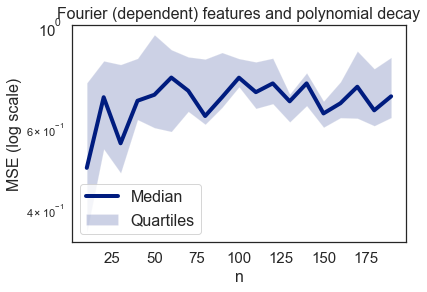

In [415]:
# plot the learning curve
sns.lineplot(x=n_list, y=mse_list, label= "Median",linewidth = 4)
plt.fill_between(x=n_list, y1=mse_lower_quartile, y2=mse_upper_quartile, alpha=0.2, label='Quartiles')
plt.title("Fourier (dependent) features and polynomial decay", fontsize = 16)
plt.xlabel("n", fontsize = 16)
plt.yscale("log")
plt.ylabel("MSE (log scale)", fontsize = 16)
plt.legend(fontsize = 16)
plt.xticks(fontsize = 15) 
plt.yticks(fontsize = 15) 
# Show the plot
plt.savefig('learning_curve_fourier_poly.pdf', bbox_inches="tight")
plt.show()

In [514]:
test_size = 1000 # test size

decay_factor = 2
noise_variance = 1

def polynomial_decay_matrix(decay_factor=decay_factor, size=p):
    # Generate diagonal entries following polynomial decay
    diagonal_entries = np.array([ (k+1)**(-decay_factor) for k in range(size)])

    # Create a diagonal matrix
    decay_matrix = np.diag(diagonal_entries)

    return decay_matrix

def generate_data(n = n, p = p, if_noise = False, noise_variance = 1, true_coefficients = np.random.normal(0, 1/p, size=p)):
# Generate a random Gaussian matrix with non-trivial covariance
    
    covariance_matrix = polynomial_decay_matrix(decay_factor=decay_factor, size=p)
    
    D = np.random.uniform(-np.pi, np.pi, n)

    # Initialize an array to store the evaluations at cos(kx) for k = 1 to p
    Z = np.zeros((n, p))

    for k in range(1, p+1):
        if k % 2 == 0:
            Z[:, k-1] = np.cos((k//2) * D) * np.sqrt(2)  # compute cosine
        else:
            Z[:, k-1] = np.sin(((k+1)//2) * D) * np.sqrt(2)  # compute sine

    input = Z @ np.sqrt(covariance_matrix)
    output = np.dot(input, true_coefficients)
    if if_noise == True:
        output += np.random.normal(0, noise_variance, size=n)
    return input, output

num_it = 20
n_list = np.arange(100,1000,100)
ratio = 100 # the overparameterization ratio
mse_list=[]
mse_upper_quartile = []
mse_lower_quartile = []
cond_list = []
cond_upper_quartile = []
cond_lower_quartile = []



for n in n_list:
    p = n * ratio
    true_coefficients = np.random.normal(0, 1/p, size=p) # determine a new random true coefficient for each n, p
    X_test, y_test = generate_data(n=test_size, p=p, if_noise=False, noise_variance = noise_variance, true_coefficients=true_coefficients)
    mse_it = []
    for it in range(num_it):
        X_train, y_train = generate_data(n=n, p=p, if_noise=True, noise_variance = noise_variance,true_coefficients=true_coefficients)
        # Initialize and fit the linear regression model
        model = LinearRegression()
        model.fit(X_train, y_train)
        # Make predictions on the test set
        y_pred = model.predict(X_test)
        # Evaluate the model
        mse = mean_squared_error(y_test, y_pred)
        mse_it.append(mse)
    mse_list.append(np.percentile(mse_it, 50))
    mse_upper_quartile.append(np.percentile(mse_it, 75))
    mse_lower_quartile.append(np.percentile(mse_it, 25))


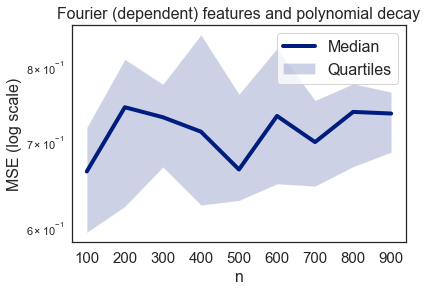

In [516]:
# plot the learning curve
sns.lineplot(x=n_list, y=mse_list, label= "Median",linewidth = 4)
plt.fill_between(x=n_list, y1=mse_lower_quartile, y2=mse_upper_quartile, alpha=0.2, label='Quartiles')
plt.title("Fourier (dependent) features and polynomial decay", fontsize = 16)
plt.xlabel("n", fontsize = 16)
plt.yscale("log")
plt.ylabel("MSE (log scale)", fontsize = 16)
plt.legend(fontsize = 16)
plt.xticks(fontsize = 15) 
plt.yticks(fontsize = 15) 
# Show the plot
plt.savefig('learning_curve_fourier_poly_ratio100.pdf', bbox_inches="tight")
plt.show()

Why happens when there is no noise? Would the bias be bounded?

In [4]:
p = 1000
n =100

test_size = 1000 # test size

decay_factor = 2
noise_variance = 1

def polynomial_decay_matrix(decay_factor=decay_factor, size=p):
    # Generate diagonal entries following polynomial decay
    diagonal_entries = np.array([ (k+1)**(-decay_factor) for k in range(size)])

    # Create a diagonal matrix
    decay_matrix = np.diag(diagonal_entries)

    return decay_matrix

def generate_data(n = n, p = p, if_noise = False, noise_variance = 1, true_coefficients = np.random.normal(0, 1/p, size=p)):
# Generate a random Gaussian matrix with non-trivial covariance
    
    covariance_matrix = polynomial_decay_matrix(decay_factor=decay_factor, size=p)
    
    D = np.random.uniform(-np.pi, np.pi, n)

    # Initialize an array to store the evaluations at cos(kx) for k = 1 to p
    Z = np.zeros((n, p))

    for k in range(1, p+1):
        if k % 2 == 0:
            Z[:, k-1] = np.cos((k//2) * D) * np.sqrt(2)  # compute cosine
        else:
            Z[:, k-1] = np.sin(((k+1)//2) * D) * np.sqrt(2)  # compute sine

    input = Z @ np.sqrt(covariance_matrix)
    output = np.dot(input, true_coefficients)
    if if_noise == True:
        output += np.random.normal(0, noise_variance, size=n)
    return input, output

num_it = 20
n_list = np.arange(100,1000,100)
ratio = 10 # the overparameterization ratio
mse_list=[]
mse_upper_quartile = []
mse_lower_quartile = []
cond_list = []
cond_upper_quartile = []
cond_lower_quartile = []



for n in n_list:
    p = n * ratio
    true_coefficients = np.random.normal(0, 1/p, size=p) # determine a new random true coefficient for each n, p
    X_test, y_test = generate_data(n=test_size, p=p, if_noise=False, noise_variance = noise_variance, true_coefficients=true_coefficients)
    mse_it = []
    for it in range(num_it):
        X_train, y_train = generate_data(n=n, p=p, if_noise=False, noise_variance = noise_variance,true_coefficients=true_coefficients)
        # Initialize and fit the linear regression model
        model = LinearRegression()
        model.fit(X_train, y_train)
        # Make predictions on the test set
        y_pred = model.predict(X_test)
        # Evaluate the model
        mse = mean_squared_error(y_test, y_pred)
        mse_it.append(mse)
    mse_list.append(np.percentile(mse_it, 50))
    mse_upper_quartile.append(np.percentile(mse_it, 75))
    mse_lower_quartile.append(np.percentile(mse_it, 25))


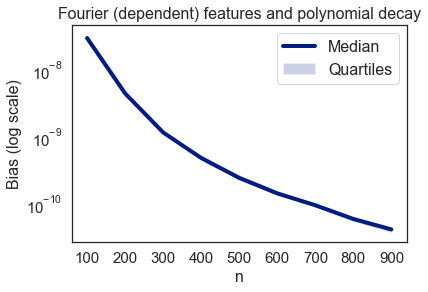

In [5]:
# plot the learning curve
sns.lineplot(x=n_list, y=mse_list, label= "Median",linewidth = 4)
plt.fill_between(x=n_list, y1=mse_lower_quartile, y2=mse_upper_quartile, alpha=0.2, label='Quartiles')
plt.title("Fourier (dependent) features and polynomial decay", fontsize = 16)
plt.xlabel("n", fontsize = 16)
plt.yscale("log")
plt.ylabel("Bias (log scale)", fontsize = 16)
plt.legend(fontsize = 16)
plt.xticks(fontsize = 15) 
plt.yticks(fontsize = 15) 
# Show the plot
plt.savefig('bias_fourier_poly_ratio10.pdf', bbox_inches="tight")
plt.show()